In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
citibike = pd.read_csv(r"C:\Users\lecce\OneDrive\CitiBike\citibike.csv")

In [39]:
citibike = pd.read_csv("C:\\Users\\lecce\\OneDrive\\CitiBike\\citibike.csv")

In [41]:
print(citibike.head())

  trip_id  bike_id weekday  start_hour           start_time  start_station_id  \
0  LnQzQk    16013     Mon          18  2013-09-09 18:18:55               523   
1  IL9boN    15230     Thu          18  2013-09-12 18:38:53               257   
2  46clGB    17942     Wed          19  2013-09-18 19:44:04               479   
3  v7vdFt    19683     Sat          11  2013-09-28 11:54:37               527   
4  VGBsb5    18024     Sat          18  2013-09-07 18:08:22               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

              end_time  end_station_id

In [43]:
print(citibike.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')


**HeatMap: This Map shows the usage of Citibikes during the day of the week and hours of the day** 

Each cell on the Map represents the relationship between the hour of day and day of the week. The cells that are colored in blue represent the high requenccy or relationship between the two on this Map, for examples we can see that during the weekday at 6 pm that the city bikes are used much more (highlighted in dark blue) compared to the bikes in use during the early morning or late at night that are highlighted in light yellow.

This type of visualization better helps us understand our users needs and the demand for bikes during peak hours vs. slow hours. For example we might want to look into what stations we can put more bikes in higher visited areas of the city during 6pm than others. 

In [45]:
heatmap_data = citibike.groupby(['weekday', 'start_hour']).size().unstack()

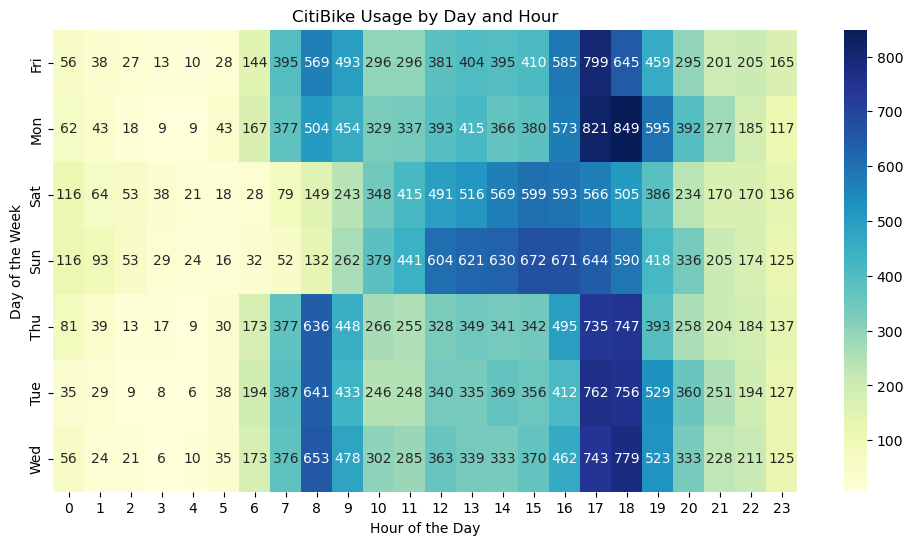

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("CitiBike Usage by Day and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

In [59]:
citibike['trip_duration'] = citibike['trip_duration'] / 60

**The Scatter Plot: Trip Duartion (minutes) vs Time of Day**

The plot below indicates that there is not a strong relationship between the time of day and the duration of trips. In the early morning hours, trips tend to be shorter, but as the day progresses, trip durations remain relatively consistent. This suggests that the time of day does not have a significant impact on how long riders use CitiBikes, indicating a weak correlation between trip start time and duration.

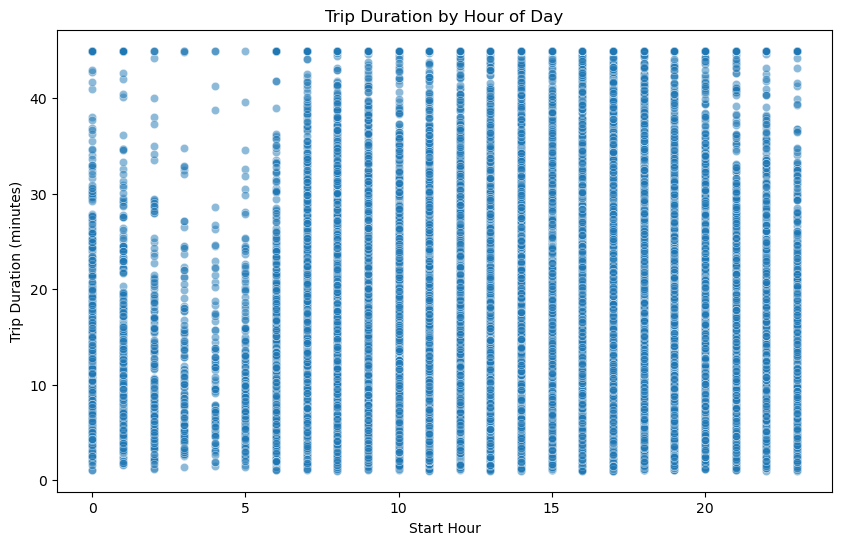

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=citibike, x='start_hour', y='trip_duration', alpha=0.5)
plt.title("Trip Duration by Hour of Day")
plt.xlabel("Start Hour")
plt.ylabel("Trip Duration (minutes)")
plt.show()

**Trip Duration (min)/ Birth Year (of Rider):** 
This scatter plot reveals a slight trend between rider age and trip duration. Riders born in the 1990s show a moderate tendency for longer trip durations, suggesting a potential relationship between younger age groups and trip length. In contrast, older riders appear to take shorter trips on average. While the relationship isn’t very strong, it hints that younger riders may be more likely to take extended trips compared to older riders.

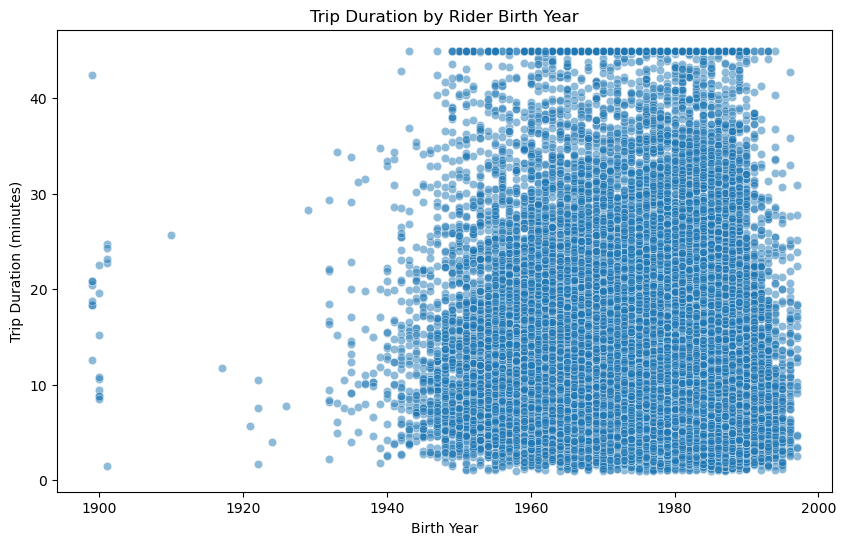

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=citibike, x='birth_year', y='trip_duration', alpha=0.5)
plt.title("Trip Duration by Rider Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Trip Duration (minutes)")
plt.show()

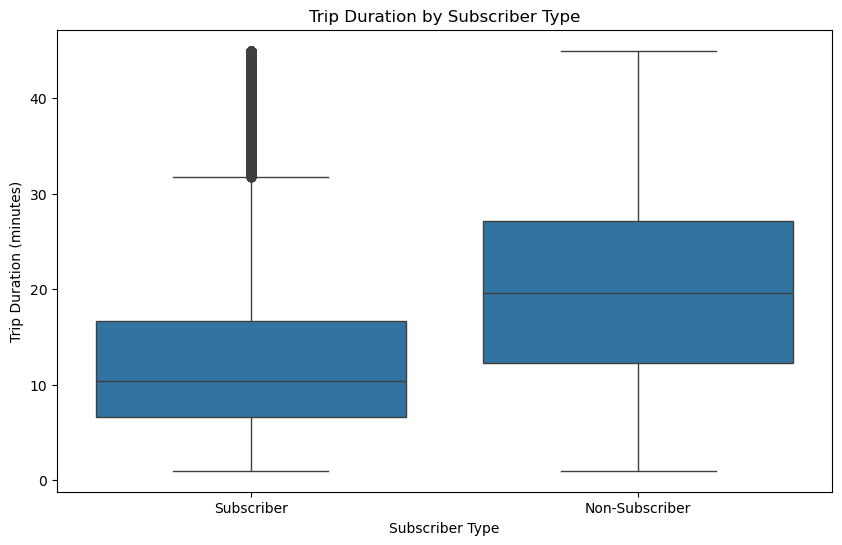

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=citibike, x='subscriber', y='trip_duration')
plt.title("Trip Duration by Subscriber Type")
plt.xlabel("Subscriber Type")
plt.ylabel("Trip Duration (minutes)")
plt.show()

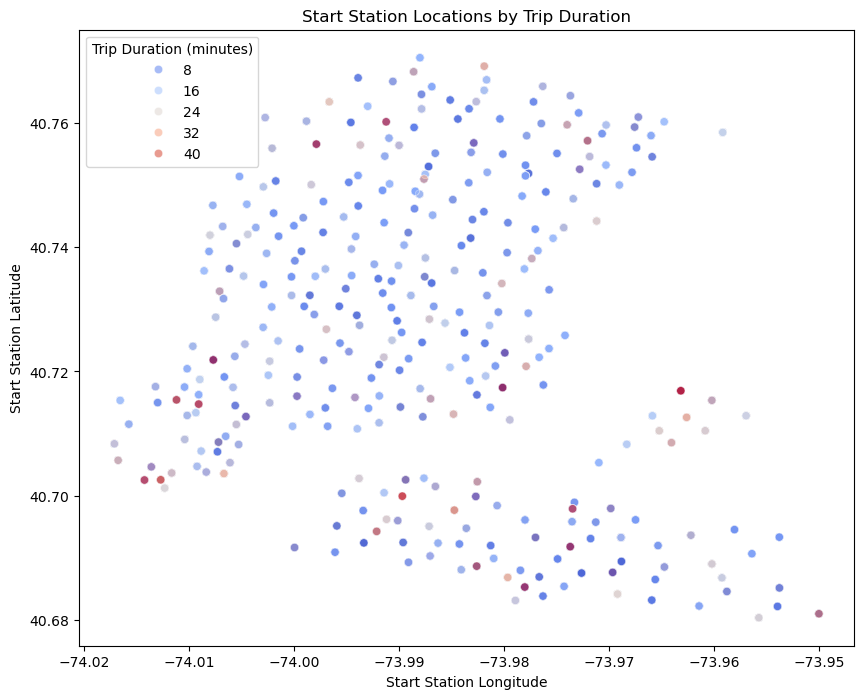

In [67]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=citibike, x='start_station_longitude', y='start_station_latitude', 
                hue='trip_duration', palette="coolwarm", alpha=0.6)
plt.title("Start Station Locations by Trip Duration")
plt.xlabel("Start Station Longitude")
plt.ylabel("Start Station Latitude")
plt.legend(title="Trip Duration (minutes)")
plt.show()

In [77]:
numeric_columns = ['trip_duration_minutes', 'start_hour', 'start_station_latitude', 
                   'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year']

In [79]:
citibike_numeric = citibike[numeric_columns]

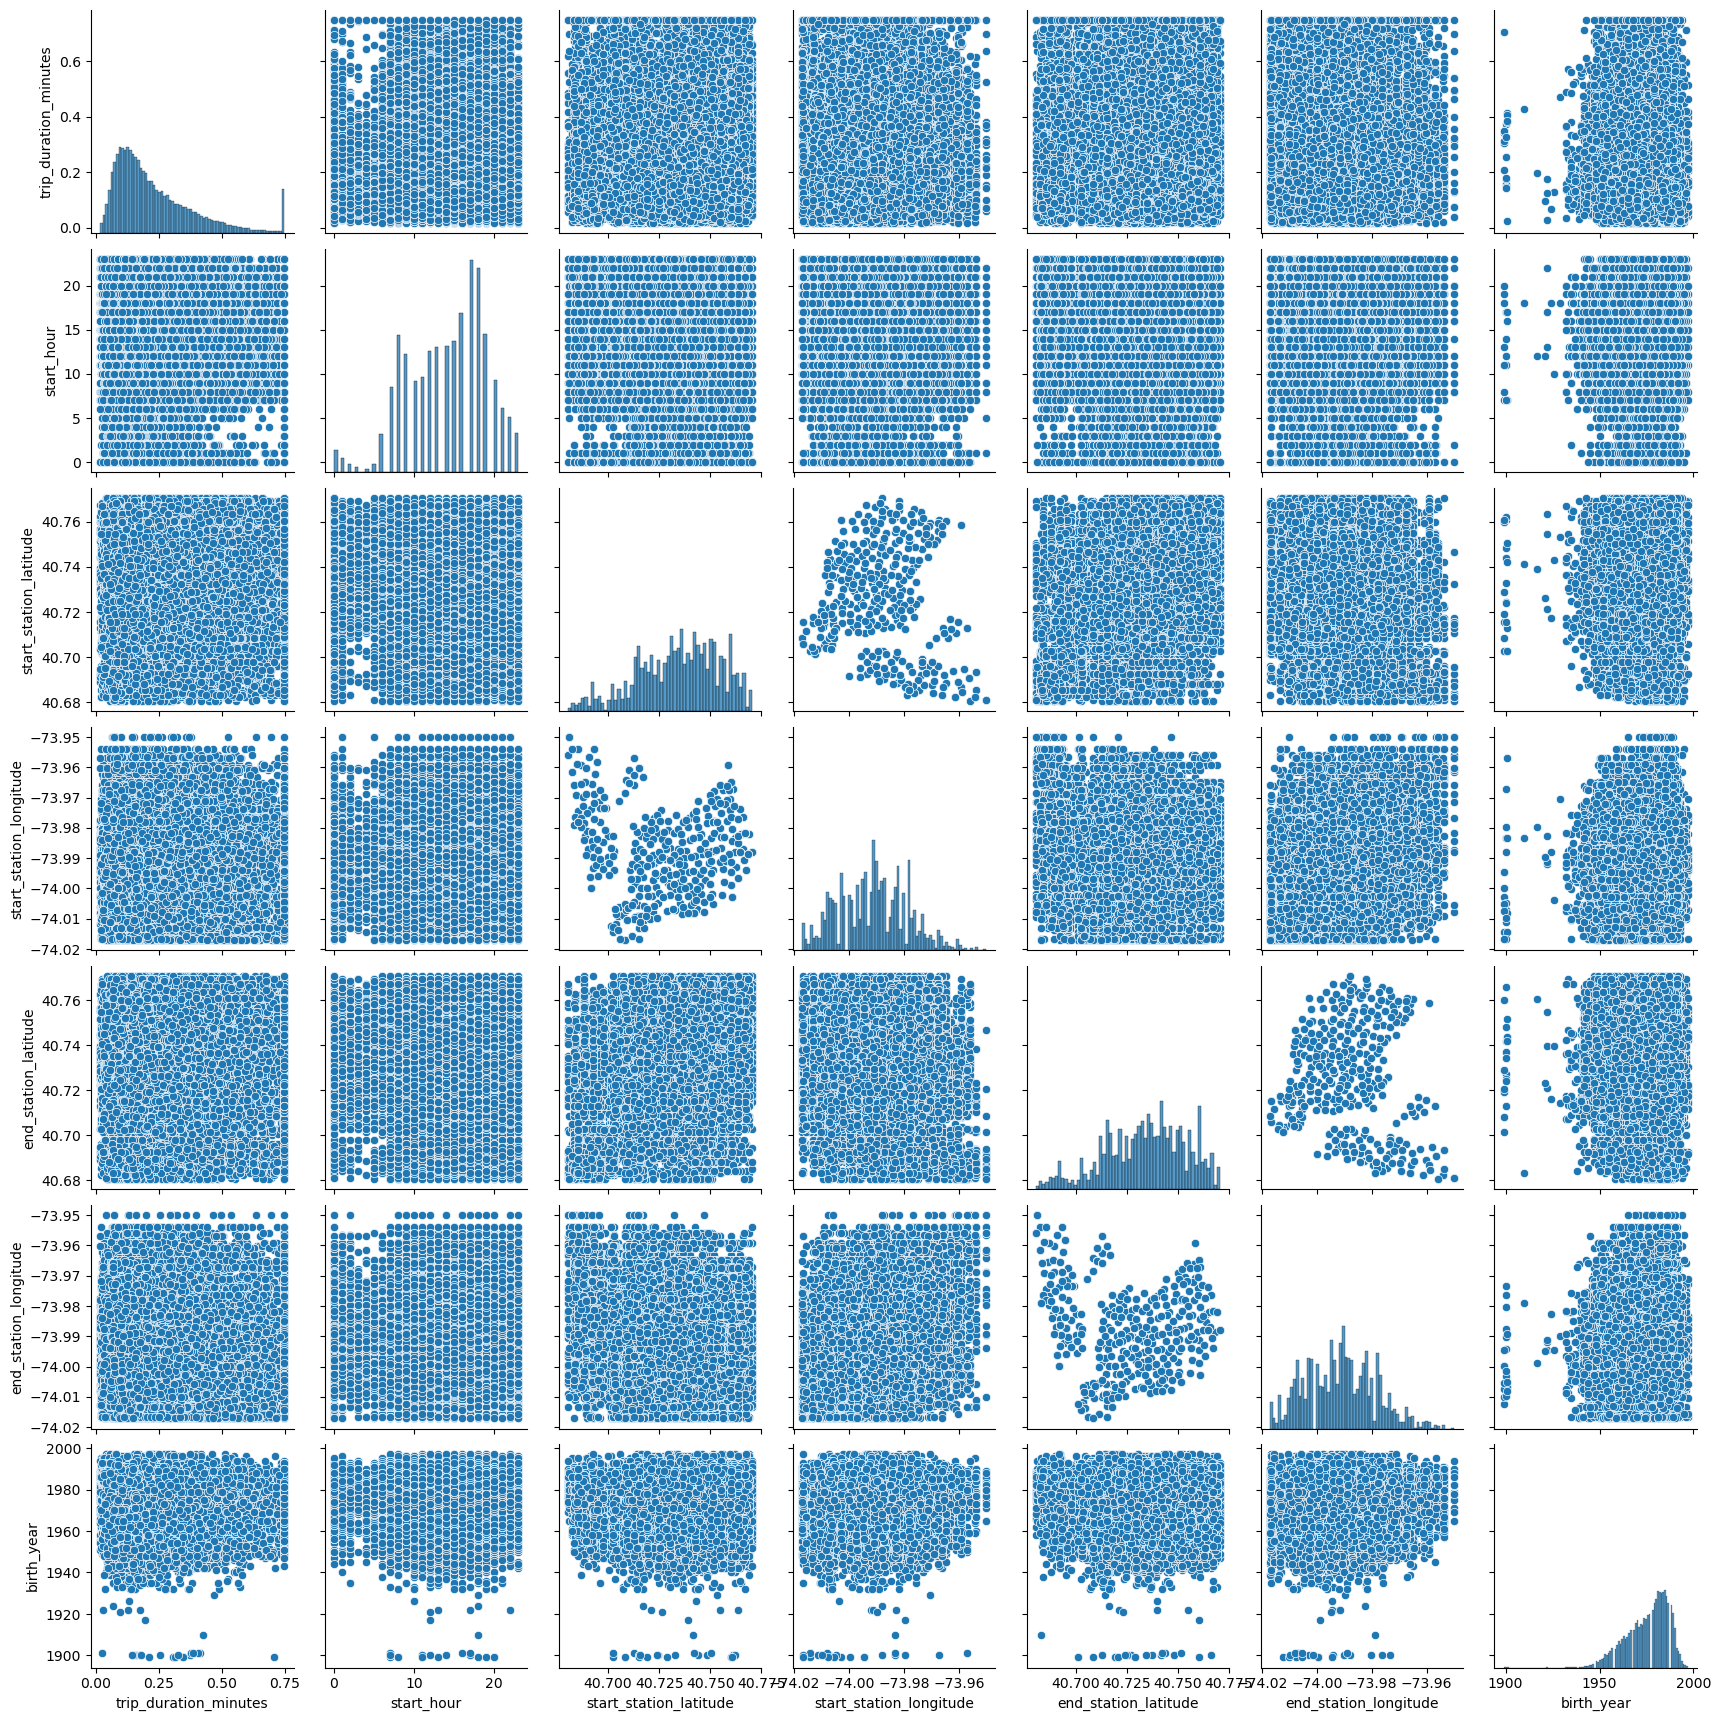

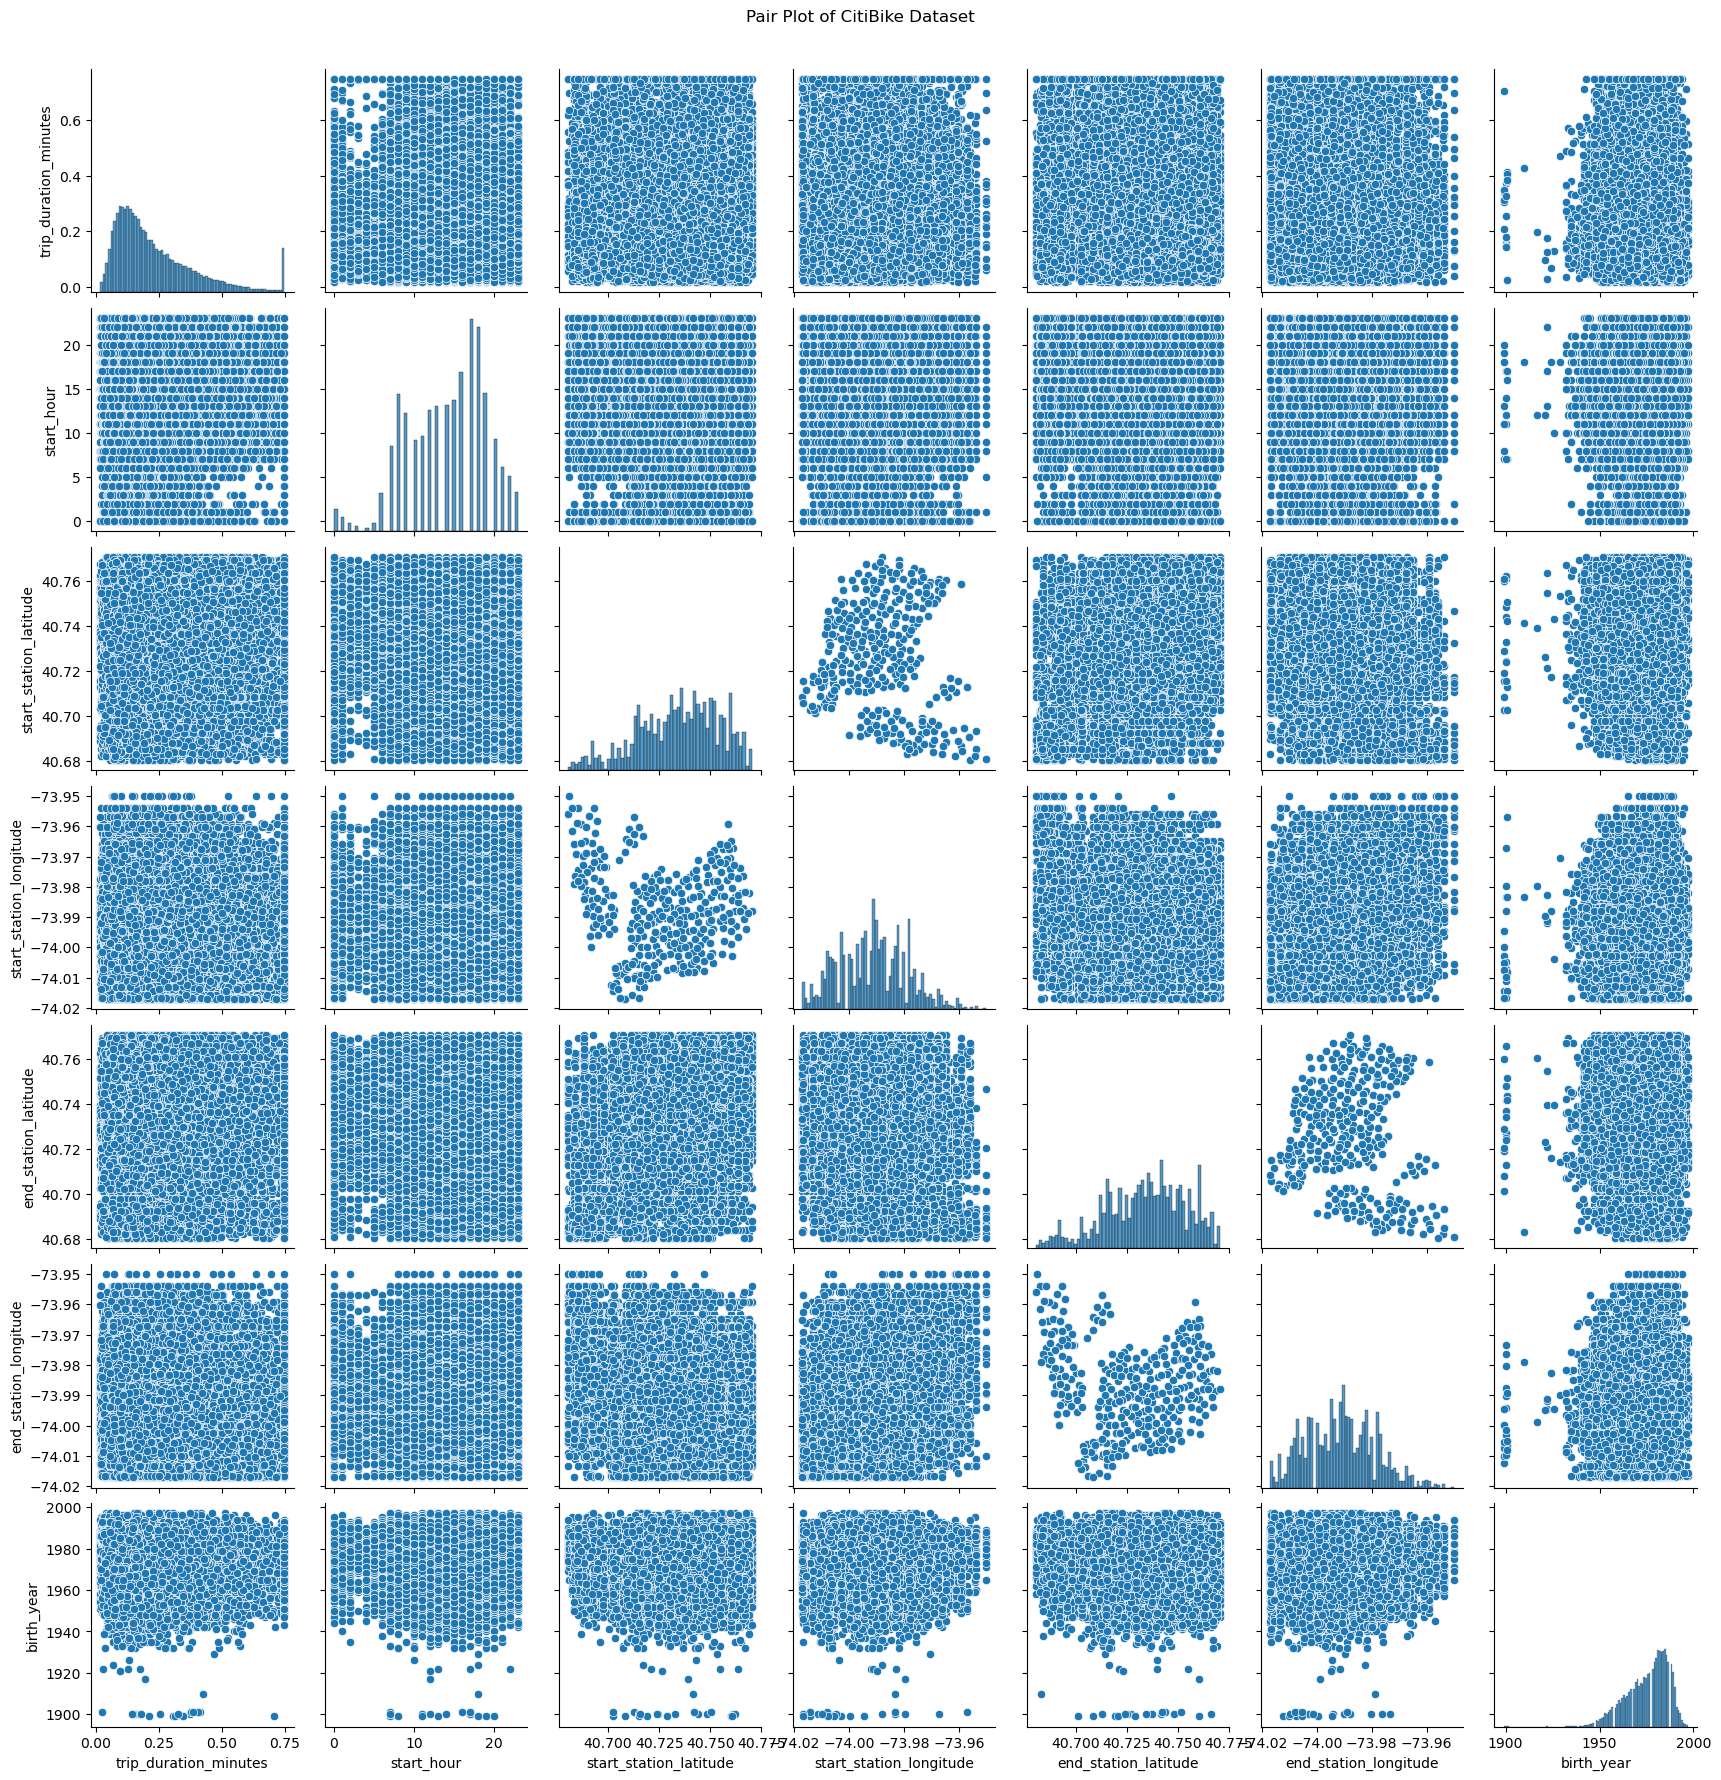

In [85]:
sns.pairplot(citibike_numeric)
g = sns.pairplot(citibike_numeric)
plt.suptitle("Pair Plot of CitiBike Dataset", y=1.02)
plt.show()

In [93]:
g.savefig(r"C:\Users\lecce\OneDrive\CitiBike.png")

**Box and Whisker Chart**
Examining trip duration by day of the week shows a stronger tendency for longer bike rides on weekends compared to weekdays. This suggests that CitiBikes are primarily used for recreational purposes on weekends, rather than for weekday commuting across NYC. For this project, it would be beneficial to focus on weekend usage patterns to understand how and where bikes are utilized for leisure activities.

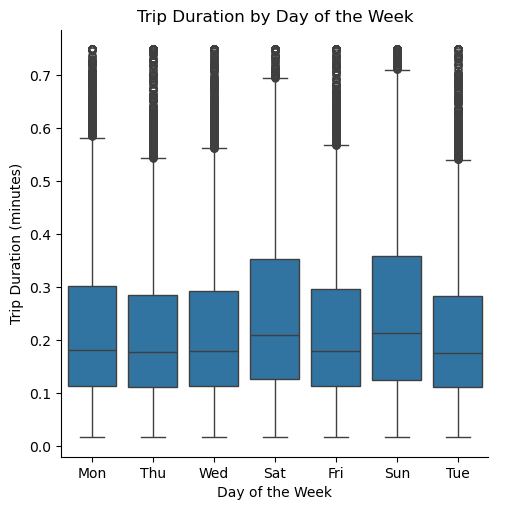

In [107]:
citibike['trip_duration_minutes'] = citibike['trip_duration'] / 60
# Create a box plot for trip duration by weekday
sns.catplot(data=citibike, x='weekday', y='trip_duration_minutes', kind='box')
plt.title("Trip Duration by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Trip Duration (minutes)")
plt.show()

**Hypothesis to further explore:** 
**Station-Based Hypothesis:** Trips starting or ending in recreational zones will have longer durations on weekends than those starting or ending in business or commuter-heavy areas.

**Station-Based Hypothesis:** Trips starting or ending in recreational zones will have longer durations on weekends than those starting or ending in business or commuter-heavy areas.
